<a href="https://www.kaggle.com/code/jhtkoo0426/house-price-regression?scriptVersionId=147868999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Fixed variables
RANDOM_STATE = 12

# Path variables
TRAIN_CSV_PATH = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
TEST_CSV_PATH = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"

In [3]:
df = pd.read_csv(TRAIN_CSV_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data preprocessing
In this section, we will perform the following preprocessing techniques to the training dataset:
1. Removing irrelevant columns such as null-valued columns, IDs, etc.
2. Dealing with categorical data using one-hot encoding.

In [5]:
def preprocess_dataset(dataset, drop_columns):
    
    dataset = dataset.drop(columns=drop_columns)
    
    # Select only int64 datatypes
    dataset = dataset.select_dtypes(include=['int64', 'float64'])
    dataset = dataset.fillna(0)
    return dataset

## Creating training & testing datasets

In [6]:
# Removing irrelevant columns (e.g. null-valued columns, Id, etc.)
drop_columns = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']

train_df = preprocess_dataset(dataset=df, drop_columns=drop_columns)
print(train_df.shape)
test_df = preprocess_dataset(dataset=pd.read_csv(TEST_CSV_PATH), drop_columns=drop_columns)
print(test_df.shape)

(1460, 37)
(1459, 36)


In [7]:
train_df.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## Understanding the dataset
In this section, we will do the following:
- Find out correlations between variables
- Identify variables with strong & weak correlations
- Find out the distribution of numerical variables

### Correlation between variables

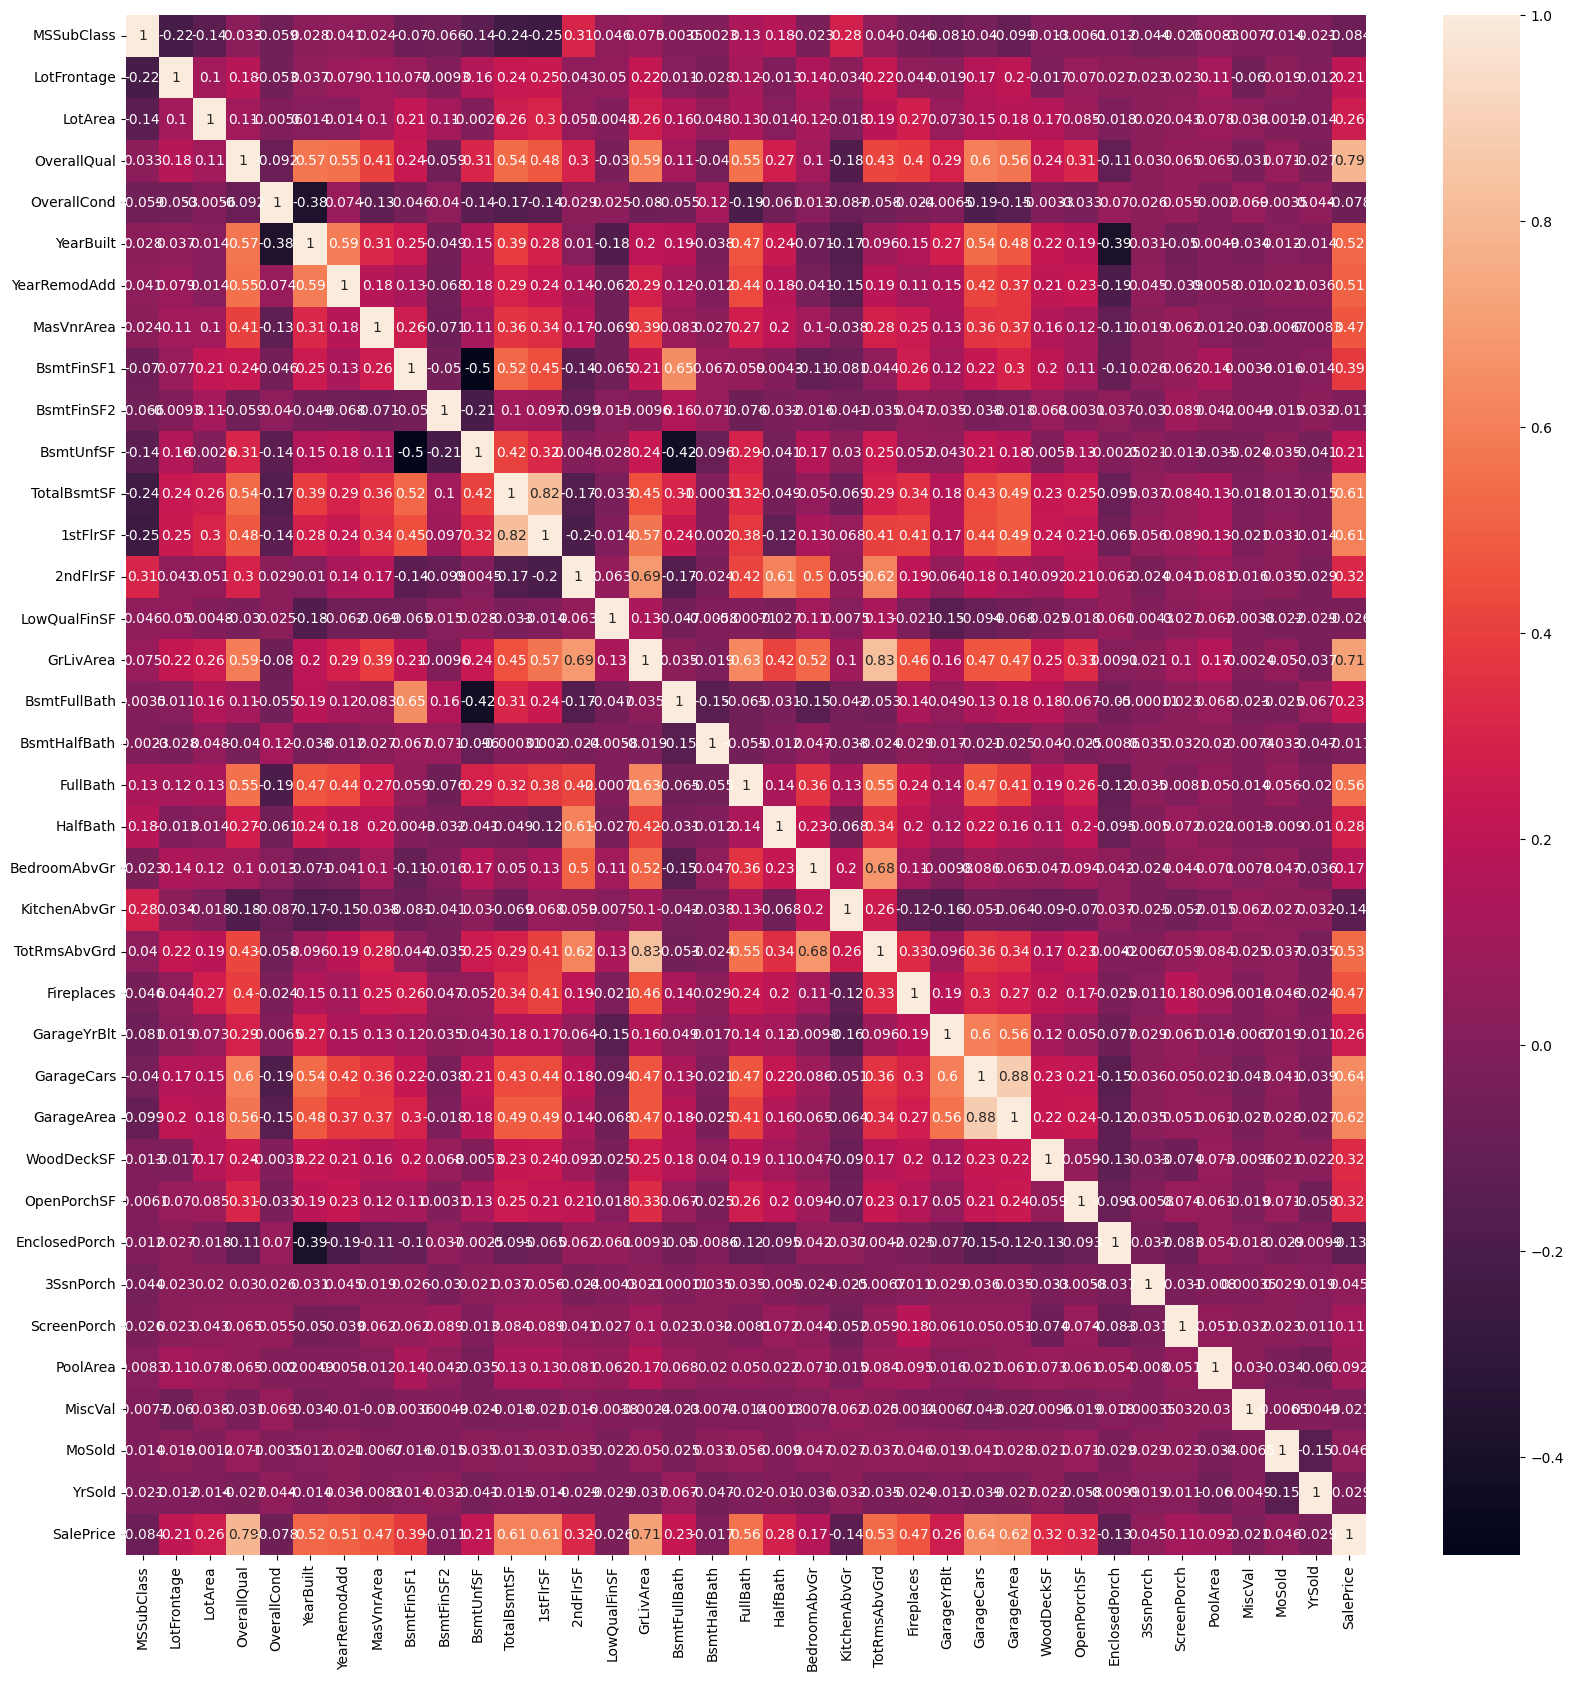

In [8]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

As seen from the above figure, the columns `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `MoSold` and `YrSold` have very weak correlation with all other variables. Thus, we will remove these columns from the dataset as well.

In [9]:
drop_columns = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
train_df = preprocess_dataset(dataset=train_df, drop_columns=drop_columns)
test_df = preprocess_dataset(dataset=test_df, drop_columns=drop_columns)

## Partitioning the dataset

In [10]:
X = train_df.drop(columns=['SalePrice'])
Y = train_df['SalePrice']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1168, 29), (292, 29), (1168,), (292,))

## Model training

In [12]:
lr_model = LinearRegression().fit(X_train, Y_train)
predictions = lr_model.predict(X_test)

In [13]:
regression_r2 = r2_score(Y_test, predictions)
print(f"Regression model R-squared: {regression_r2}")

Regression model R-squared: 0.789854928326335


## Predicting the test set

In [14]:
test_df2 = pd.read_csv(TEST_CSV_PATH)
submission_df = test_df2[['Id']]

Preprocess and get model outputs on test_df

In [15]:
drop_columns = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
test_df2 = preprocess_dataset(dataset=test_df2, drop_columns=drop_columns)
test_predictions = lr_model.predict(test_df2)

## Create submission

In [16]:
submission_df['SalePrice'] = test_predictions
submission_df = submission_df.set_index('Id')

In [17]:
submission = submission_df.to_csv("submission.csv", encoding='utf-8')

In [18]:
!head submission.csv

Id,SalePrice
1461,108993.75279648858
1462,160013.28255726316
1463,172842.5364950701
1464,199945.80457997636
1465,190663.4909916767
1466,185344.66878561478
1467,199971.03975005995
1468,172131.27540186606
1469,210028.40542663308
